## 1. Import Required Libraries

In [5]:
import pandas as pd
import sqlite3
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Connect to Database and Load CSV Files

In [6]:
# Get the current directory
current_dir = Path('/Users/aryanrajsaxena/Desktop/evaluation/TEXT-TO-SQL')

# Create SQLite database in memory or file
db_path = current_dir / 'bike_shop.db'
conn = sqlite3.connect(str(db_path))
cursor = conn.cursor()

print(f"Connected to database: {db_path}")

# CSV files to load
csv_files = {
    'stores': 'stores.csv',
    'brands': 'brands.csv',
    'categories': 'categories.csv',
    'products': 'products.csv',
    'customers': 'customers.csv',
    'orders': 'orders.csv',
    'order_items': 'order_items.csv',
    'staffs': 'staffs.csv',
    'stocks': 'stocks.csv'
}

# Load CSV files into SQLite
for table_name, csv_file in csv_files.items():
    csv_path = current_dir / csv_file
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"✓ Loaded {table_name} ({len(df)} rows)")
    else:
        print(f"✗ File not found: {csv_file}")

print("\nAll tables loaded successfully!")

Connected to database: /Users/aryanrajsaxena/Desktop/evaluation/TEXT-TO-SQL/bike_shop.db
✓ Loaded stores (3 rows)
✓ Loaded brands (9 rows)
✓ Loaded categories (7 rows)
✓ Loaded products (321 rows)
✓ Loaded customers (1445 rows)
✓ Loaded orders (1615 rows)
✓ Loaded order_items (4722 rows)
✓ Loaded staffs (10 rows)
✓ Loaded stocks (939 rows)

All tables loaded successfully!


## 3. Helper Function to Execute Queries

In [7]:
def execute_query(query, query_num=None, expected_answer=None):
    """
    Execute a SQL query and display the results
    """
    try:
        start_time = time.time()
        df = pd.read_sql_query(query, conn)
        execution_time = time.time() - start_time
        
        if query_num:
            print(f"\n{'='*80}")
            print(f"Question {query_num}")
            print(f"{'='*80}")
        
        print(f"\n📊 Results ({len(df)} rows):")
        print(df.to_string())
        print(f"\n⏱️  Execution time: {execution_time:.4f} seconds")
        
        if expected_answer:
            print(f"\n✓ Expected Answer: {expected_answer}")
        
        return df
    except Exception as e:
        print(f"\n❌ Error executing query: {str(e)}")
        return None

print("Helper function created!")

Helper function created!


---
# EASY LEVEL QUERIES (Questions 1-5)

## Question 1: How many stores do we have?

In [8]:
query_1 = """
SELECT COUNT(*) as total_stores
FROM stores;
"""

execute_query(query_1, query_num=1, expected_answer="3")


Question 1

📊 Results (1 rows):
   total_stores
0             3

⏱️  Execution time: 0.0074 seconds

✓ Expected Answer: 3


,total_stores
0,3


## Question 2: List all brand names in our catalog

In [10]:
query_2 = """
SELECT brand_name FROM brands ORDER BY brand_name;
"""

execute_query(query_2, query_num=2, expected_answer="11 brands")


Question 2

📊 Results (9 rows):
     brand_name
0       Electra
1          Haro
2        Heller
3   Pure Cycles
4       Ritchey
5       Strider
6  Sun Bicycles
7         Surly
8          Trek

⏱️  Execution time: 0.0048 seconds

✓ Expected Answer: 11 brands


,brand_name
0,Electra
1,Haro
2,Heller
3,Pure Cycles
4,Ritchey
5,Strider
6,Sun Bicycles
7,Surly
8,Trek


## Question 3: What is the email address of the Santa Cruz Bikes store?

In [11]:
query_3 = """
SELECT email FROM stores WHERE store_name = 'Santa Cruz Bikes';
"""

execute_query(query_3, query_num=3, expected_answer="santacruz@bikes.shop")


Question 3

📊 Results (1 rows):
                  email
0  santacruz@bikes.shop

⏱️  Execution time: 0.0076 seconds

✓ Expected Answer: santacruz@bikes.shop


,email
0,santacruz@bikes.shop


## Question 4: How many customers do we have in total?

In [12]:
query_4 = """
SELECT COUNT(*) as total_customers FROM customers;
"""

execute_query(query_4, query_num=4, expected_answer="1446")


Question 4

📊 Results (1 rows):
   total_customers
0             1445

⏱️  Execution time: 0.0031 seconds

✓ Expected Answer: 1446


,total_customers
0,1445


## Question 5: Show me the first 3 products in our catalog

In [ ]:
query_5 = """
SELECT product_id, product_name, list_price FROM products ORDER BY product_id LIMIT 3;
"""

execute_query(query_5, query_num=5)


Question 5

📊 Results (3 rows):
   product_id                        product_name  list_price
0           1                     Trek 820 - 2016      379.99
1           2  Ritchey Timberwolf Frameset - 2016      749.99
2           3     Surly Wednesday Frameset - 2016      999.99

⏱️  Execution time: 0.0034 seconds


,product_id,product_name,list_price
0,1,Trek 820 - 2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,749.99
2,3,Surly Wednesday Frameset - 2016,999.99


---
# MEDIUM LEVEL QUERIES (Questions 6-13)

## Question 6: Get all products from the Trek brand with their prices

In [14]:
query_6 = """
SELECT p.product_id, p.product_name, p.list_price
FROM products p
JOIN brands b ON p.brand_id = b.brand_id
WHERE b.brand_name = 'Trek'
ORDER BY p.product_name;
"""

execute_query(query_6, query_num=6)


Question 6

📊 Results (135 rows):
     product_id                                  product_name  list_price
0           165                              Trek 1120 - 2018     2499.99
1             1                               Trek 820 - 2016      379.99
2           112                               Trek 820 - 2018      379.99
3           206                      Trek Boone 5 Disc - 2018     3299.99
4            62                           Trek Boone 7 - 2017     3499.99
5           207                      Trek Boone 7 Disc - 2018     3999.99
6            63           Trek Boone Race Shop Limited - 2017     3499.99
7            83               Trek Boy's Kickster - 2015/2017      149.99
8           316          Trek Checkpoint ALR 4 Women's - 2019     1699.99
9           317                  Trek Checkpoint ALR 5 - 2019     1999.99
10          318          Trek Checkpoint ALR 5 Women's - 2019     1999.99
11          321           Trek Checkpoint ALR Frameset - 2019     3199.99
12 

,product_id,product_name,list_price
0,165,Trek 1120 - 2018,2499.99
1,1,Trek 820 - 2016,379.99
2,112,Trek 820 - 2018,379.99
3,206,Trek Boone 5 Disc - 2018,3299.99
4,62,Trek Boone 7 - 2017,3499.99
5,207,Trek Boone 7 Disc - 2018,3999.99
6,63,Trek Boone Race Shop Limited - 2017,3499.99
7,83,Trek Boy's Kickster - 2015/2017,149.99
8,316,Trek Checkpoint ALR 4 Women's - 2019,1699.99
9,317,Trek Checkpoint ALR 5 - 2019,1999.99


## Question 7: Top 5 customers by total amount spent

In [21]:
query_7 = """
SELECT c.first_name, c.last_name, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as total_spent FROM customers c LEFT JOIN orders o ON c.customer_id = o.customer_id LEFT JOIN order_items oi ON o.order_id = oi.order_id GROUP BY c.customer_id, c.first_name, c.last_name ORDER BY total_spent DESC LIMIT 5;
"""

execute_query(query_7, query_num=7)


Question 7

📊 Results (5 rows):
  first_name last_name  total_spent
0     Sharyn   Hopkins   34807.9392
1    Pamelia    Newman   33634.2604
2       Abby    Gamble   32803.0062
3    Lyndsey      Bean   32675.0725
4     Emmitt   Sanchez   31925.8857

⏱️  Execution time: 0.0110 seconds


,first_name,last_name,total_spent
0,Sharyn,Hopkins,34807.9392
1,Pamelia,Newman,33634.2604
2,Abby,Gamble,32803.0062
3,Lyndsey,Bean,32675.0725
4,Emmitt,Sanchez,31925.8857


## Question 8: Which categories have more than 20 products?

In [25]:
query_8 = """
SELECT c.category_name as product_count FROM categories c JOIN products p ON c.category_id = p.category_id GROUP BY c.category_id, c.category_name HAVING COUNT(p.product_id) > 20 ORDER BY product_count DESC;
"""

execute_query(query_8, query_num=8)


Question 8

📊 Results (6 rows):
       product_count
0         Road Bikes
1     Mountain Bikes
2     Electric Bikes
3  Cruisers Bicycles
4   Comfort Bicycles
5  Children Bicycles

⏱️  Execution time: 0.0081 seconds


,product_count
0,Road Bikes
1,Mountain Bikes
2,Electric Bikes
3,Cruisers Bicycles
4,Comfort Bicycles
5,Children Bicycles


## Question 9: List customers from New York state and their total spending

In [29]:
query_9 = """
SELECT c.customer_id, c.first_name, c.last_name, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as total_spent FROM customers c JOIN orders o ON c.customer_id = o.customer_id JOIN order_items oi ON o.order_id = oi.order_id WHERE c.state = 'NY' GROUP BY c.customer_id, c.first_name, c.last_name, c.state ORDER BY total_spent DESC LIMIT 5;
"""

execute_query(query_9, query_num=9)


Question 9

📊 Results (5 rows):
   customer_id first_name last_name  total_spent
0           94     Sharyn   Hopkins   34807.9392
1           10    Pamelia    Newman   33634.2604
2           75       Abby    Gamble   32803.0062
3            6    Lyndsey      Bean   32675.0725
4           16     Emmitt   Sanchez   31925.8857

⏱️  Execution time: 0.0179 seconds


,customer_id,first_name,last_name,total_spent
0,94,Sharyn,Hopkins,34807.9392
1,10,Pamelia,Newman,33634.2604
2,75,Abby,Gamble,32803.0062
3,6,Lyndsey,Bean,32675.0725
4,16,Emmitt,Sanchez,31925.8857


## Question 10: Show all orders placed at the Baldwin Bikes store

In [30]:
query_10 = """
SELECT o.order_id, c.first_name, c.last_name, o.order_date, s.store_name
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN stores s ON o.store_id = s.store_id
WHERE s.store_name = 'Baldwin Bikes'
ORDER BY o.order_date DESC
LIMIT 10;
"""

execute_query(query_10, query_num=10)


Question 10

📊 Results (10 rows):
   order_id first_name  last_name  order_date     store_name
0      1613      Debra      Burks  2018-11-18  Baldwin Bikes
1      1611    Lyndsey       Bean  2018-09-06  Baldwin Bikes
2      1610     Linnie     Branch  2018-08-25  Baldwin Bikes
3      1609    Pamelia     Newman  2018-08-23  Baldwin Bikes
4      1604    Latasha       Hays  2018-06-17  Baldwin Bikes
5      1602      Diana     Guerra  2018-04-30  Baldwin Bikes
6      1603  Georgeann     Waller  2018-04-30  Baldwin Bikes
7      1599     Caroll       Hays  2018-04-29  Baldwin Bikes
8      1600   Marjorie      Logan  2018-04-29  Baldwin Bikes
9      1594    Bennett  Armstrong  2018-04-28  Baldwin Bikes

⏱️  Execution time: 0.0073 seconds


,order_id,first_name,last_name,order_date,store_name
0,1613,Debra,Burks,2018-11-18,Baldwin Bikes
1,1611,Lyndsey,Bean,2018-09-06,Baldwin Bikes
2,1610,Linnie,Branch,2018-08-25,Baldwin Bikes
3,1609,Pamelia,Newman,2018-08-23,Baldwin Bikes
4,1604,Latasha,Hays,2018-06-17,Baldwin Bikes
5,1602,Diana,Guerra,2018-04-30,Baldwin Bikes
6,1603,Georgeann,Waller,2018-04-30,Baldwin Bikes
7,1599,Caroll,Hays,2018-04-29,Baldwin Bikes
8,1600,Marjorie,Logan,2018-04-29,Baldwin Bikes
9,1594,Bennett,Armstrong,2018-04-28,Baldwin Bikes


## Question 11: Total revenue from each product (Top 10)

In [36]:
query_11 = """
SELECT p.product_id, p.product_name, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as total_revenue FROM products p JOIN order_items oi ON p.product_id = oi.product_id GROUP BY p.product_id, p.product_name ORDER BY total_revenue DESC LIMIT 5;
"""

execute_query(query_11, query_num=11)


Question 11

📊 Results (5 rows):
   product_id                   product_name  total_revenue
0           7       Trek Slash 8 27.5 - 2016    555558.6111
1           9           Trek Conduit+ - 2016    389248.7025
2           4       Trek Fuel EX 8 29 - 2016    368472.7294
3          11    Surly Straggler 650b - 2016    226765.5510
4          56  Trek Domane SLR 6 Disc - 2017    211584.6153

⏱️  Execution time: 0.0128 seconds


,product_id,product_name,total_revenue
0,7,Trek Slash 8 27.5 - 2016,555558.6111
1,9,Trek Conduit+ - 2016,389248.7025
2,4,Trek Fuel EX 8 29 - 2016,368472.7294
3,11,Surly Straggler 650b - 2016,226765.5510
4,56,Trek Domane SLR 6 Disc - 2017,211584.6153


## Question 12: Show all products that contain 'Trek' in their name

In [37]:
query_12 = """
SELECT product_id, product_name, list_price
FROM products
WHERE product_name LIKE '%Trek%'
ORDER BY product_name;
"""

execute_query(query_12, query_num=12)


Question 12

📊 Results (135 rows):
     product_id                                  product_name  list_price
0           165                              Trek 1120 - 2018     2499.99
1             1                               Trek 820 - 2016      379.99
2           112                               Trek 820 - 2018      379.99
3           206                      Trek Boone 5 Disc - 2018     3299.99
4            62                           Trek Boone 7 - 2017     3499.99
5           207                      Trek Boone 7 Disc - 2018     3999.99
6            63           Trek Boone Race Shop Limited - 2017     3499.99
7            83               Trek Boy's Kickster - 2015/2017      149.99
8           316          Trek Checkpoint ALR 4 Women's - 2019     1699.99
9           317                  Trek Checkpoint ALR 5 - 2019     1999.99
10          318          Trek Checkpoint ALR 5 Women's - 2019     1999.99
11          321           Trek Checkpoint ALR Frameset - 2019     3199.99
12

,product_id,product_name,list_price
0,165,Trek 1120 - 2018,2499.99
1,1,Trek 820 - 2016,379.99
2,112,Trek 820 - 2018,379.99
3,206,Trek Boone 5 Disc - 2018,3299.99
4,62,Trek Boone 7 - 2017,3499.99
5,207,Trek Boone 7 Disc - 2018,3999.99
6,63,Trek Boone Race Shop Limited - 2017,3499.99
7,83,Trek Boy's Kickster - 2015/2017,149.99
8,316,Trek Checkpoint ALR 4 Women's - 2019,1699.99
9,317,Trek Checkpoint ALR 5 - 2019,1999.99


## Question 13: How many orders were placed in January 2016?

In [ ]:
query_13 = """
SELECT COUNT(*) as orders_in_january FROM orders WHERE strftime('%Y-%m', order_date) = '2016-01';
"""

execute_query(query_13, query_num=13)


Question 13

📊 Results (1 rows):
   orders_in_january
0                 50

⏱️  Execution time: 0.0054 seconds


,orders_in_january
0,50


---
# HARD LEVEL QUERIES (Questions 14-20)

## Question 14: Find customers who have spent more than the average order value

In [42]:
query_14 = """
SELECT c.customer_id, c.first_name, c.last_name,
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as customer_total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, c.first_name, c.last_name
HAVING SUM(oi.quantity * oi.list_price * (1 - oi.discount)) > 
       (SELECT AVG(order_value) FROM (
           SELECT SUM(quantity * list_price * (1 - discount)) as order_value
           FROM order_items
           GROUP BY order_id
       ) AS order_values)
ORDER BY customer_total_spent DESC
LIMIT 5;
"""

execute_query(query_14, query_num=14)


Question 14

📊 Results (5 rows):
   customer_id first_name last_name  customer_total_spent
0           94     Sharyn   Hopkins            34807.9392
1           10    Pamelia    Newman            33634.2604
2           75       Abby    Gamble            32803.0062
3            6    Lyndsey      Bean            32675.0725
4           16     Emmitt   Sanchez            31925.8857

⏱️  Execution time: 0.0157 seconds


,customer_id,first_name,last_name,customer_total_spent
0,94,Sharyn,Hopkins,34807.9392
1,10,Pamelia,Newman,33634.2604
2,75,Abby,Gamble,32803.0062
3,6,Lyndsey,Bean,32675.0725
4,16,Emmitt,Sanchez,31925.8857


## Question 15: Show the top-selling product in each category

In [ ]:
query_15 = """
SELECT c.category_name, p.product_id, p.product_name,
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as category_product_revenue
FROM products p
JOIN categories c ON p.category_id = c.category_id
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY c.category_name, p.product_id, p.product_name
ORDER BY c.category_name, category_product_revenue DESC;
"""

execute_query(query_15, query_num=15)


Question 15

📊 Results (307 rows):
           category_name  product_id                                           product_name  category_product_revenue
0      Children Bicycles          23          Electra Girl's Hawaii 1 (20-inch) - 2015/2016                41011.6329
1      Children Bicycles          22          Electra Girl's Hawaii 1 (16-inch) - 2015/2016                34728.8137
2      Children Bicycles          21                     Electra Cruiser 1 (24-Inch) - 2016                34078.1378
3      Children Bicycles         100          Electra Townie 3i EQ (20-inch) - Boys' - 2017                17125.1505
4      Children Bicycles          95                     Electra Girl's Hawaii 1 16" - 2017                12785.5738
5      Children Bicycles          91           Trek Precaliber 24 (21-Speed) - Girls - 2017                12179.6520
6      Children Bicycles         101             Electra Townie 7D (20-inch) - Boys' - 2017                12079.8447
7      Children Bicy

,category_name,product_id,product_name,category_product_revenue
0,Children Bicycles,23,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,41011.6329
1,Children Bicycles,22,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,34728.8137
2,Children Bicycles,21,Electra Cruiser 1 (24-Inch) - 2016,34078.1378
3,Children Bicycles,100,Electra Townie 3i EQ (20-inch) - Boys' - 2017,17125.1505
4,Children Bicycles,95,"Electra Girl's Hawaii 1 16"" - 2017",12785.5738
5,Children Bicycles,91,Trek Precaliber 24 (21-Speed) - Girls - 2017,12179.6520
6,Children Bicycles,101,Electra Townie 7D (20-inch) - Boys' - 2017,12079.8447
7,Children Bicycles,97,Electra Savannah 3i (20-inch) - Girl's - 2017,10258.2069
8,Children Bicycles,96,Electra Moto 3i (20-inch) - Boy's - 2017,9680.7234
9,Children Bicycles,99,Electra Sugar Skulls 1 (20-inch) - Girl's - 2017,9095.6968


## Question 16: Staff performance metrics - orders handled and revenue

query_16 = """
SELECT st.staff_id, st.first_name, st.last_name, s.store_name,
       COUNT(DISTINCT o.order_id) as total_orders,
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as total_revenue
FROM staffs st
JOIN stores s ON st.store_id = s.store_id
LEFT JOIN orders o ON st.staff_id = o.staff_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY st.staff_id, st.first_name, st.last_name, s.store_name
ORDER BY total_revenue DESC;
"""

execute_query(query_16, query_num=16)

## Question 17: Find products that have never been ordered

In [50]:
query_17 = """
SELECT p.product_id, p.product_name, p.list_price FROM products p WHERE p.product_id NOT IN (SELECT DISTINCT oi.product_id FROM order_items oi ) ORDER BY p.product_name;
"""

execute_query(query_17, query_num=17)


Question 17

📊 Results (14 rows):
    product_id                                    product_name  list_price
0          284    Electra Savannah 1 (20-inch) - Girl's - 2018      319.99
1          291  Electra Sweet Ride 1 (20-inch) - Girl's - 2018      319.99
2          195            Electra Townie Go! 8i Ladies' - 2018     2599.99
3          121                   Surly Krampus Frameset - 2018     2499.99
4            1                                 Trek 820 - 2016      379.99
5          316            Trek Checkpoint ALR 4 Women's - 2019     1699.99
6          317                    Trek Checkpoint ALR 5 - 2019     1999.99
7          318            Trek Checkpoint ALR 5 Women's - 2019     1999.99
8          321             Trek Checkpoint ALR Frameset - 2019     3199.99
9          319             Trek Checkpoint SL 5 Women's - 2019     2799.99
10         320                     Trek Checkpoint SL 6 - 2019     3799.99
11         154           Trek Domane SLR 6 Disc Women's - 2018   

,product_id,product_name,list_price
0,284,Electra Savannah 1 (20-inch) - Girl's - 2018,319.99
1,291,Electra Sweet Ride 1 (20-inch) - Girl's - 2018,319.99
2,195,Electra Townie Go! 8i Ladies' - 2018,2599.99
3,121,Surly Krampus Frameset - 2018,2499.99
4,1,Trek 820 - 2016,379.99
5,316,Trek Checkpoint ALR 4 Women's - 2019,1699.99
6,317,Trek Checkpoint ALR 5 - 2019,1999.99
7,318,Trek Checkpoint ALR 5 Women's - 2019,1999.99
8,321,Trek Checkpoint ALR Frameset - 2019,3199.99
9,319,Trek Checkpoint SL 5 Women's - 2019,2799.99


## Question 18: Show inventory status for each product in each store

In [ ]:
query_18 = """
SELECT s.store_name, p.product_id, p.product_name, st.quantity,
       CASE 
           WHEN st.quantity <= 10 THEN 'Low'
           WHEN st.quantity BETWEEN 11 AND 30 THEN 'Medium'
           ELSE 'High'
       END as stock_status
FROM stores s
CROSS JOIN products p
LEFT JOIN stocks st ON s.store_id = st.store_id AND p.product_id = st.product_id
WHERE st.quantity IS NOT NULL
ORDER BY s.store_name, st.quantity
LIMIT 15;
"""

execute_query(query_18, query_num=18)

## Question 19: What is the monthly revenue trend for 2016?

In [54]:
query_19 = """
SELECT strftime('%Y-%m', o.order_date) as month, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as monthly_revenue, COUNT(DISTINCT o.order_id) as orders_count FROM orders o JOIN order_items oi ON o.order_id = oi.order_id WHERE strftime('%Y', o.order_date) = '2016' GROUP BY strftime('%Y-%m', o.order_date) ORDER BY month;
"""

df_19 = execute_query(query_19, query_num=19)


Question 19

📊 Results (12 rows):
      month  monthly_revenue  orders_count
0   2016-01      215146.4241            50
1   2016-02      156112.3228            49
2   2016-03      180600.3285            55
3   2016-04      167144.0512            43
4   2016-05      205270.0091            51
5   2016-06      210562.1245            45
6   2016-07      199556.8089            50
7   2016-08      225657.3767            63
8   2016-09      273091.6097            67
9   2016-10      212078.0805            64
10  2016-11      182329.4124            43
11  2016-12      199829.9792            55

⏱️  Execution time: 0.0111 seconds


## Question 20: Customers who bought from multiple stores - CLV Analysis

In [4]:
query_20 = """
SELECT c.customer_id, c.first_name, c.last_name, 
       COUNT(DISTINCT o.store_id) as stores_shopped,
       COUNT(DISTINCT o.order_id) as total_orders,
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as lifetime_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, c.first_name, c.last_name
HAVING COUNT(DISTINCT o.store_id) > 1
ORDER BY lifetime_value DESC
LIMIT 10;
"""

execute_query(query_20, query_num=20)

NameError: name 'execute_query' is not defined

In [12]:
Query_21 = """
SELECT p.product_id, p.product_name, c.state,
       SUM(oi.quantity) as total_quantity_sold,
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as total_revenue
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
WHERE c.state = 'CA'
GROUP BY p.product_id, p.product_name
ORDER BY total_revenue DESC
LIMIT 3;"""

execute_query(Query_21)
df_ca_products = execute_query(Query_21)



📊 Results (3 rows):
   product_id              product_name state  total_quantity_sold  total_revenue
0           7  Trek Slash 8 27.5 - 2016    CA                   32    115119.7122
1           9      Trek Conduit+ - 2016    CA                   39    103199.6560
2           4  Trek Fuel EX 8 29 - 2016    CA                   31     81286.7197

⏱️  Execution time: 0.0152 seconds

📊 Results (3 rows):
   product_id              product_name state  total_quantity_sold  total_revenue
0           7  Trek Slash 8 27.5 - 2016    CA                   32    115119.7122
1           9      Trek Conduit+ - 2016    CA                   39    103199.6560
2           4  Trek Fuel EX 8 29 - 2016    CA                   31     81286.7197

⏱️  Execution time: 0.0038 seconds


## Top 3 Best-Selling Products from California

Available columns: ['product_id', 'product_name', 'state', 'total_quantity_sold', 'total_revenue']


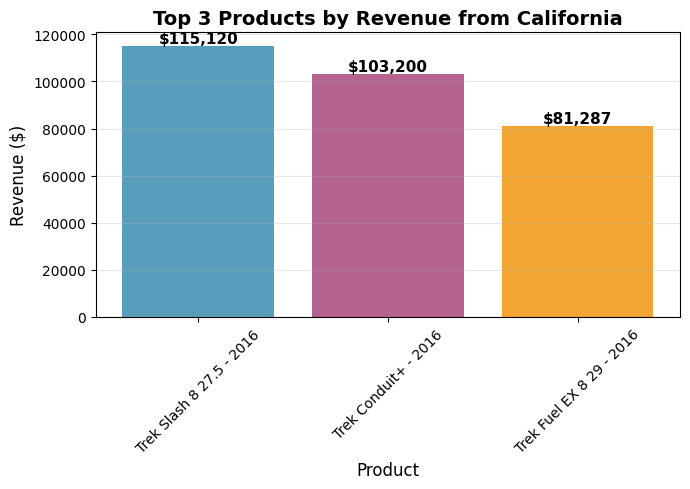

✓ California top products visualization created!


In [17]:
# Visualize California top 3 products
if df_ca_products is not None and len(df_ca_products) > 0:
    # Print columns to debug
    print("Available columns:", df_ca_products.columns.tolist())
    
    # Get the correct column names
    revenue_col = [col for col in df_ca_products.columns if 'revenue' in col.lower()][0]
    qty_col = [col for col in df_ca_products.columns if 'qty' in col.lower() or 'quantity' in col.lower()][0]
    product_col = [col for col in df_ca_products.columns if 'product_name' in col.lower()][0]
    
    fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
    
    # Revenue comparison
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    bars1 = ax1.bar(df_ca_products[product_col], df_ca_products[revenue_col], color=colors, alpha=0.8)
    ax1.set_title('Top 3 Products by Revenue from California', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Product', fontsize=12)
    ax1.set_ylabel('Revenue ($)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on top of bars for revenue
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    
    # Add value labels on top of bars for quantity
    
    plt.tight_layout()
    plt.show()
    print("✓ California top products visualization created!")
else:
    print("No data available for visualization")

---
# Data Visualization & Analysis

## Monthly Revenue Trend Visualization

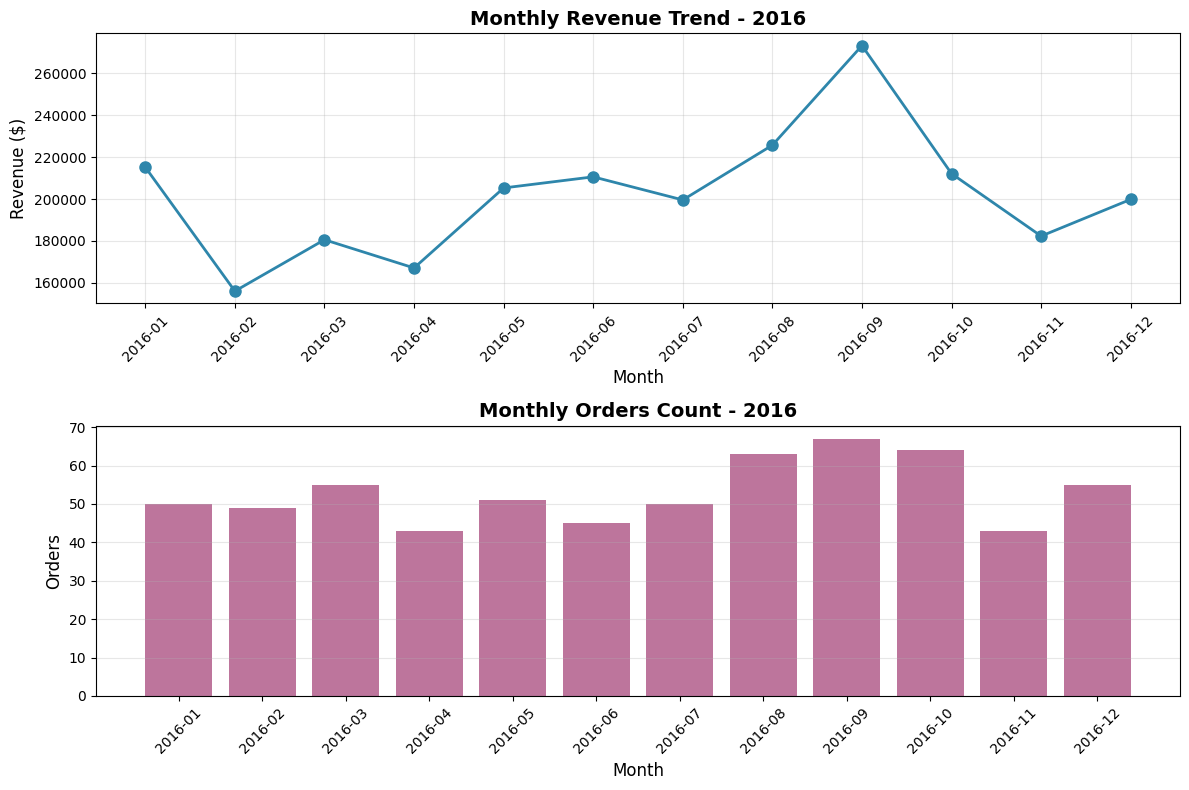

✓ Monthly trend visualization created!


In [53]:
# Visualize monthly revenue trend
if df_19 is not None and len(df_19) > 0:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Monthly Revenue
    ax1.plot(df_19['month'], df_19['monthly_revenue'], marker='o', linewidth=2, markersize=8, color='#2E86AB')
    ax1.set_title('Monthly Revenue Trend - 2016', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Revenue ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # Monthly Orders
    ax2.bar(df_19['month'], df_19['orders_count'], color='#A23B72', alpha=0.7)
    ax2.set_title('Monthly Orders Count - 2016', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Month', fontsize=12)
    ax2.set_ylabel('Orders', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    print("✓ Monthly trend visualization created!")
else:
    print("No data available for visualization")

## Top Products by Revenue

# Get top products by revenue
top_products_query = """
SELECT p.product_name, 
       SUM(oi.quantity * oi.list_price * (1 - oi.discount)) as revenue
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_id, p.product_name
ORDER BY revenue DESC
LIMIT 10;
"""

df_top_products = pd.read_sql_query(top_products_query, conn)

if df_top_products is not None and len(df_top_products) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(df_top_products)), df_top_products['revenue'], color='#F18F01')
    plt.yticks(range(len(df_top_products)), df_top_products['product_name'])
    plt.xlabel('Revenue ($)', fontsize=12)
    plt.title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    print("✓ Top products visualization created!")

## Database Summary Statistics

In [ ]:
print("\n" + "="*80)
print("DATABASE SUMMARY STATISTICS")
print("="*80)

# Get summary statistics
summary_queries = {
    'Total Stores': 'SELECT COUNT(*) FROM stores',
    'Total Products': 'SELECT COUNT(*) FROM products',
    'Total Customers': 'SELECT COUNT(*) FROM customers',
    'Total Orders': 'SELECT COUNT(*) FROM orders',
    'Total Order Items': 'SELECT COUNT(*) FROM order_items',
    'Total Staff': 'SELECT COUNT(*) FROM staffs',
    'Total Brands': 'SELECT COUNT(*) FROM brands',
    'Total Categories': 'SELECT COUNT(*) FROM categories',
    'Total Stock Records': 'SELECT COUNT(*) FROM stocks'
}

for label, query in summary_queries.items():
    result = pd.read_sql_query(query, conn).iloc[0, 0]
    print(f"\n✓ {label}: {result:,}")

# Total Revenue
revenue_query = 'SELECT SUM(quantity * list_price * (1 - discount)) FROM order_items'
total_revenue = pd.read_sql_query(revenue_query, conn).iloc[0, 0]
print(f"\n✓ Total Revenue: ${total_revenue:,.2f}")

print("\n" + "="*80)

## Close Database Connection

---

## Close Database Connection

In [ ]:
# Close the database connection
conn.close()
print("✓ Database connection closed!")
print("\n🎉 All queries executed successfully!")